In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install langid
!pip install iso639

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import langid
import iso639


#PRIMER DATASET COURSERA

In [ ]:
coursera = pd.read_csv('/content/drive/MyDrive/DATASET/DataAnalyst/Coursera_courses.csv')

In [ ]:
coursera.head()

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training


In [ ]:
coursera.shape

(623, 4)

In [ ]:
coursera.isnull().sum()

name           0
institution    0
course_url     0
course_id      0
dtype: int64

In [ ]:
coursera.duplicated().sum()

0

In [ ]:
fila_psychology = coursera[coursera['name'] == 'Introduction to Psychology']
fila_psychology

,name,institution,course_url,course_id
6,Introduction to Psychology,Yale University,https://www.coursera.org/learn/introduction-ps...,introduction-psychology
54,Introduction to Psychology,University of Toronto,https://www.coursera.org/learn/introduction-psych,introduction-psych


In [ ]:
coursera['institution'].value_counts()

University of Pennsylvania       43
University of Michigan           31
Duke University                  24
Google Cloud                     22
IBM                              18
                                 ..
EDHEC Business School             1
INSEAD                            1
Google - Spectrum Sharing         1
New York Institute of Finance     1
UCL School of Management          1
Name: institution, Length: 134, dtype: int64

#Verificación de valores duplicados

In [ ]:
coursera['institution'].nunique()

134

In [ ]:
coursera['course_id'].nunique()

623

#Nube de Palabras

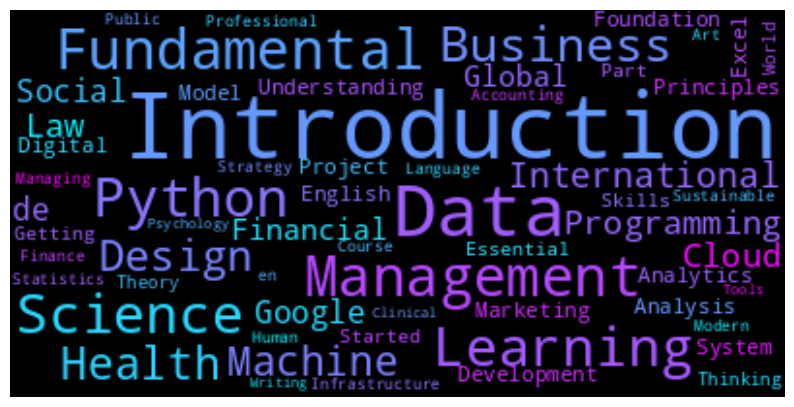

In [ ]:
plt.figure(figsize = (10,9))

text = ' '.join(subject_titles for subject_titles in coursera['name'])

word_cloud = WordCloud(collocations = False,
                       background_color='black',
                       colormap = 'cool_r',
                       min_font_size = 7).generate(text)

plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Función para detectar el idioma de un texto usando langid.py
def detect_language(text):
    lang, confidence = langid.classify(text)
    return iso639.to_name(lang)

# Aplicar la función a la columna 'course_title' y crear una nueva columna 'language'
coursera['language'] = coursera['name'].apply(detect_language)

In [ ]:
coursera[['course_id','language']]


#SEGUNDO DATASET COURSERA

In [ ]:
coursera_rw = pd.read_csv('/content/drive/MyDrive/DATASET/DataAnalyst/Coursera_reviews.csv')

In [ ]:
coursera_rw.head()

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training


In [ ]:
coursera_rw.shape

(1454711, 5)

In [ ]:
coursera_rw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454711 entries, 0 to 1454710
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   reviews       1454571 non-null  object
 1   reviewers     1454711 non-null  object
 2   date_reviews  1454711 non-null  object
 3   rating        1454711 non-null  int64 
 4   course_id     1454711 non-null  object
dtypes: int64(1), object(4)
memory usage: 55.5+ MB


In [ ]:
coursera_rw['date_reviews'] = pd.to_datetime(coursera_rw['date_reviews'])

In [ ]:
coursera_rw.head()

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,2020-02-12,4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,2020-09-28,4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,2020-04-08,4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,2020-02-24,4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,2020-06-18,4,google-cbrs-cpi-training


#Verificación de duplicados

In [ ]:
coursera_rw.duplicated().sum()


934764

In [ ]:
coursera_rw_clean = coursera_rw.drop_duplicates()

In [ ]:
coursera_rw_clean.shape

(519947, 5)

<ipython-input-30-0dc37df37bbf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coursera_rw_clean['year'] = coursera_rw_clean['date_reviews'].dt.year


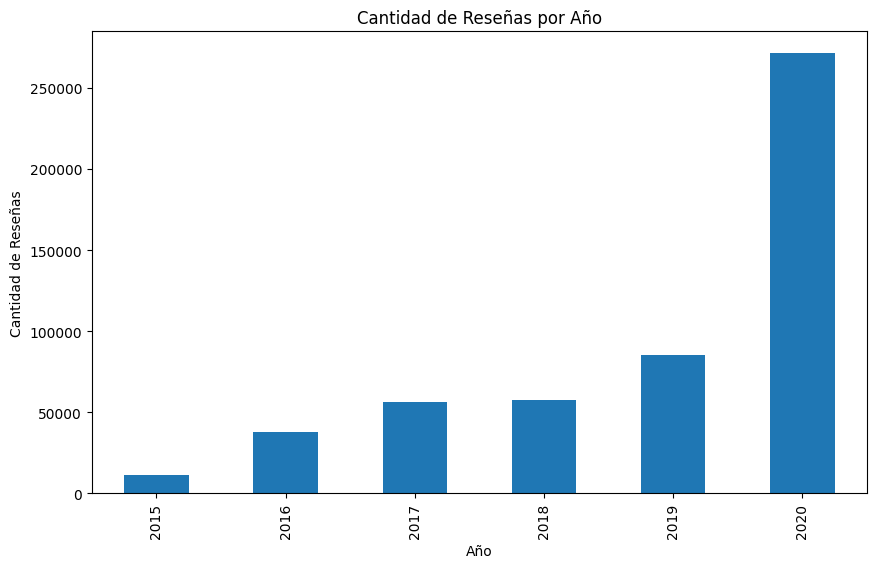

In [ ]:
# Extraer el año de la columna 'date_reviews'
coursera_rw_clean['year'] = coursera_rw_clean['date_reviews'].dt.year

# Contar las reseñas por año
conteo_por_año = coursera_rw_clean['year'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
conteo_por_año.plot(kind='bar')
plt.xlabel('Año')
plt.ylabel('Cantidad de Reseñas')
plt.title('Cantidad de Reseñas por Año')
plt.show()

Desde el 2015 al 2020 se observa un aumento de cantidad de reseñas de personas que han tomado el curso.

In [ ]:
coursera_rw_clean.isnull().sum()

reviews         56
reviewers        0
date_reviews     0
rating           0
course_id        0
year             0
dtype: int64

In [ ]:
coursera_rw_clean['course_id'].value_counts()

python                                                       15226
machine-learning                                             12677
neural-networks-deep-learning                                12292
technical-support-fundamentals                               12055
learning-how-to-learn                                        11871
                                                             ...  
remote-team-management                                           5
social-work-practice-advocating-social-justice-and-change        5
the-business-of-product-management-one                           5
entreprise-changement-climatique                                 2
building-modern-python-applications-on-aws                       1
Name: course_id, Length: 604, dtype: int64

In [ ]:
count_by_course_id = coursera_rw_clean['course_id'].value_counts(normalize=False)
count_by_course_id_df = pd.DataFrame({'course_id': count_by_course_id.index, 'count': count_by_course_id})
count_by_course_id_df.to_csv('count_by_course_id.csv', index=False)

In [ ]:
coursera_rw_clean['course_id'].nunique()

604

In [ ]:
coursera_rw_clean['reviews'] = coursera_rw_clean['reviews'].fillna('No Review')

<ipython-input-35-8484b16d2c67>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coursera_rw_clean['reviews'] = coursera_rw_clean['reviews'].fillna('No Review')


In [ ]:
coursera_rw_clean['rating'].value_counts()

5    408118
4     81401
3     17733
1      6625
2      6070
Name: rating, dtype: int64

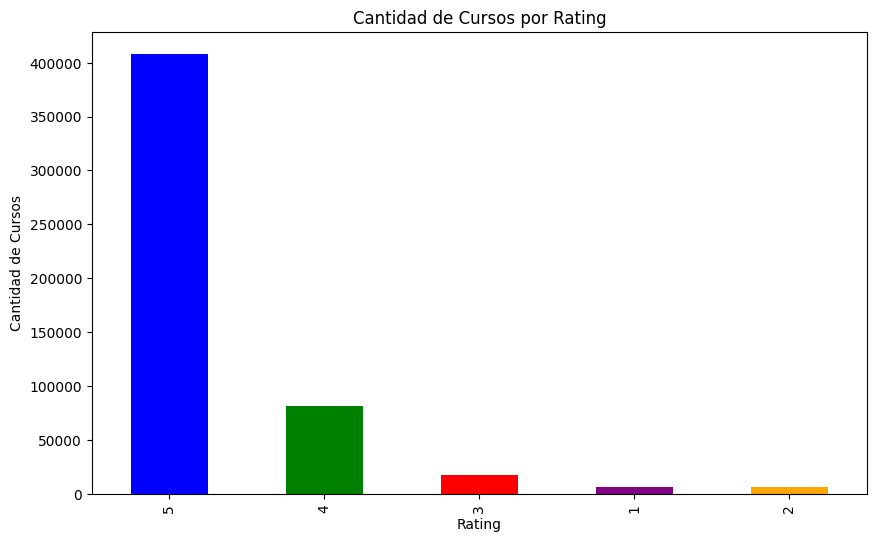

In [ ]:
rating_conteo = coursera_rw_clean['rating'].value_counts()
# Crear una paleta de colores personalizada
colores = ['blue', 'green', 'red', 'purple', 'orange']

# Crear el gráfico de barras con colores personalizados
plt.figure(figsize=(10, 6))
rating_conteo.plot(kind='bar', color=colores)
plt.xlabel('Rating')
plt.ylabel('Cantidad de Cursos')
plt.title('Cantidad de Cursos por Rating')
plt.show()

La mayoría de cursos han tenido un rating de 5 , por lo que el servicio que se ofrece es de calidad.

In [ ]:
# Obtener los valores únicos de 'course_id' en cada dataframe
cursos_coursera = set(coursera['course_id'])
cursos_coursera_rw = set(coursera_rw_clean['course_id'])

# Contar los valores iguales y los que no tienen enlace
iguales = len(cursos_coursera.intersection(cursos_coursera_rw))
sin_enlace = len(cursos_coursera.difference(cursos_coursera_rw))

print("Valores iguales: ", iguales)
print("Valores sin enlace: ", sin_enlace)

Valores iguales:  604
Valores sin enlace:  19


In [ ]:
# Obtener los valores únicos de 'course_id' en cada dataframe
cursos_coursera = set(coursera['course_id'])
cursos_coursera_rw = set(coursera_rw_clean['course_id'])

# Obtener los valores sin enlace
valores_sin_enlace = cursos_coursera.difference(cursos_coursera_rw)

print(valores_sin_enlace)

{'unraveling-the-cycling-city', 'data-science-course', 'game-theory-1', 'algorithms-divide-conquer', 'international-law-in-action-2', 'edinburgh-music-theory', 'digital-analytics', 'marketing-analytics', 'analytics-tableau', 'dairy-production', 'security-safety-globalized-world', 'probabilistic-graphical-models', 'organizational-analysis', 'marketing-plan', 'introduction-clinical-data', 'changing-global-order', 'hotel-distribution', 'circular-economy', 'mindfulness'}


#TERCER DATASAT EDX

In [ ]:
edx = pd.read_csv('/content/drive/MyDrive/DATASET/DataAnalyst/edx_courses.csv')

In [ ]:
edx.head(2)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...


In [ ]:
edx.shape

(975, 16)

In [ ]:
edx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          855 non-null    object
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   instructors         972 non-null    object
 6   Level               975 non-null    object
 7   subject             975 non-null    object
 8   language            975 non-null    object
 9   subtitles           972 non-null    object
 10  course_effort       975 non-null    object
 11  course_length       975 non-null    object
 12  price               975 non-null    object
 13  course_description  935 non-null    object
 14  course_syllabus     417 non-null    object
 15  course_url          975 non-null    object
dtypes: object(16)
memory usage

In [ ]:
edx.isnull().sum()

title                   0
summary                53
n_enrolled            120
course_type             0
institution             0
instructors             3
Level                   0
subject                 0
language                0
subtitles               3
course_effort           0
course_length           0
price                   0
course_description     40
course_syllabus       558
course_url              0
dtype: int64

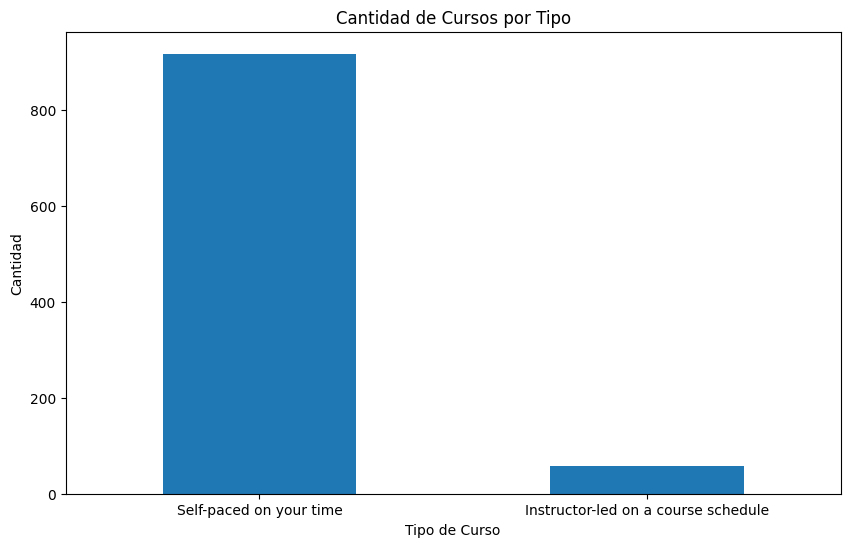

In [ ]:
# Obtener los valores de conteo de cada tipo de curso
course_type_counts = edx['course_type'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
course_type_counts.plot(kind='bar')
plt.xlabel('Tipo de Curso')
plt.ylabel('Cantidad')
plt.title('Cantidad de Cursos por Tipo')

# Mostrar las etiquetas del eje x en posición horizontal
plt.xticks(rotation='horizontal')

plt.show()

La mayor cantidad de cursos ofrecidos son aquellos que se adapten a los tiempos de las personas.

---



#Top 5 de Instituciones con más cursos

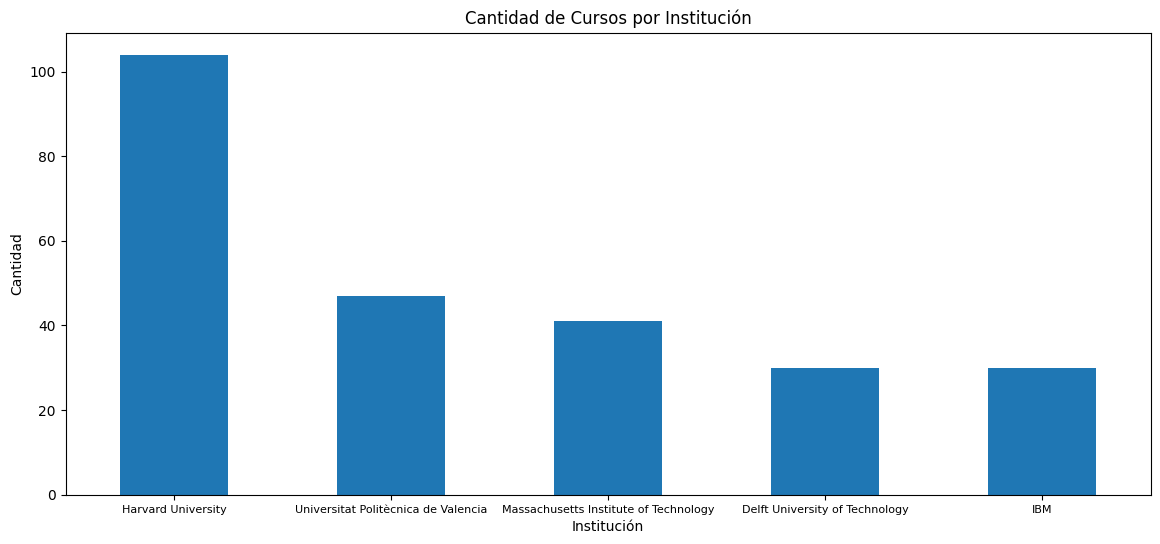

In [ ]:
# Obtener los valores de conteo de cada institución
institution_counts = edx['institution'].value_counts()

# Número de instituciones a mostrar
top_n = 5

# Obtener las instituciones más frecuentes
top_institutions = institution_counts.head(top_n)

# Crear el gráfico de barras
plt.figure(figsize=(14, 6))
top_institutions.plot(kind='bar')
plt.xlabel('Institución')
plt.ylabel('Cantidad')
plt.title('Cantidad de Cursos por Institución')

# Ajustar el tamaño de las etiquetas del eje x
plt.tick_params(axis='x', labelsize=8)

# Mostrar las etiquetas del eje x en posición horizontal
plt.xticks(rotation='horizontal')

plt.show()

Se detalla el top 5 de universidades que más ofrecen cursos en la plataforma, liderada por Harvard University

In [ ]:
edx['institution'].value_counts()

Harvard University                                                    104
Universitat Politècnica de Valencia                                    47
Massachusetts Institute of Technology                                  41
Delft University of Technology                                         30
IBM                                                                    30
                                                                     ... 
The University of Tokyo                                                 1
Educational Testing Service                                             1
The National University of Singapore                                    1
University of Oxford                                                    1
University of Maryland Global Campus-University System of Maryland      1
Name: institution, Length: 111, dtype: int64

#Distribución de Niveles

In [ ]:
edx['Level'].value_counts()

Introductory    621
Intermediate    267
Advanced         87
Name: Level, dtype: int64

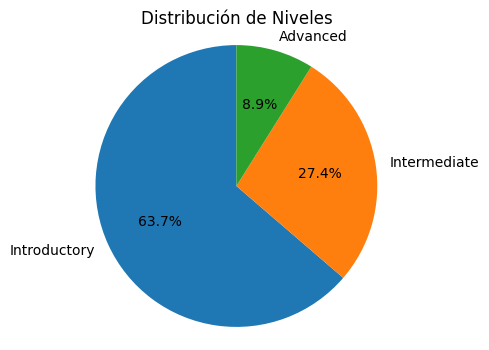

In [ ]:
level_counts = edx['Level'].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(4, 4))
plt.pie(level_counts, labels=level_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Niveles')

plt.axis('equal')  # Para que el gráfico sea circular

plt.show()

La mayoría de cursos ofrecidos por la plataforma son Introductorios.

#Distribución de materias

In [ ]:
edx['subject'].nunique()

31

<ipython-input-51-ff517b8a8f35>:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subject_counts = top_subjects.append(pd.Series([other_count], index=['Otros']))


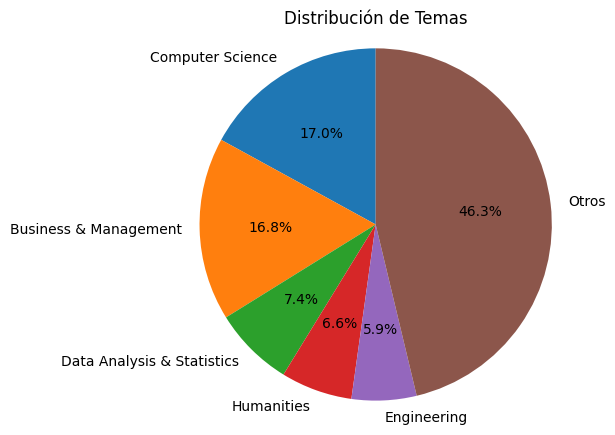

In [ ]:
# Obtener los valores de conteo de los 5 primeros temas
top_subjects = edx['subject'].value_counts().head(5)

# Sumar el conteo de los temas restantes
other_count = edx['subject'].value_counts().sum() - top_subjects.sum()

# Crear una nueva serie con los 5 primeros temas y el conteo de "Otros"
subject_counts = top_subjects.append(pd.Series([other_count], index=['Otros']))

# Crear el gráfico de pastel
plt.figure(figsize=(5, 5))
plt.pie(subject_counts, labels=subject_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Temas')

plt.axis('equal')  # Para que el gráfico sea circular

plt.show()

El top 3 de cursos ofrecidos corresponden a Computer Science con 17%; segudido por Busines & Managemen con 16.8% y Data Analysis & Statistics con 7.4%.

#Distribución de Idiomas

In [ ]:
edx['language'].value_counts()

English          777
Español          176
Français           7
Italiano           4
中文                 4
Português          4
日本語                1
اللغة العربية      1
Deutsch            1
Name: language, dtype: int64

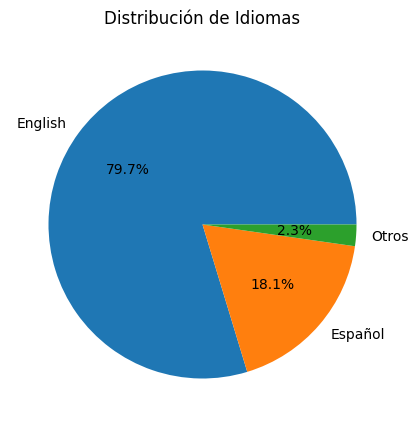

In [ ]:
# Obtener los valores de conteo de idiomas
language_counts = edx['language'].value_counts()

# Obtener los 2 idiomas principales y agrupar el resto como "Otros"
top_languages = language_counts.head(2)
other_languages = pd.Series(language_counts[2:].sum(), index=['Otros'])

# Combinar los 2 idiomas principales y "Otros" en un solo DataFrame
combined_languages = pd.concat([top_languages, other_languages])

# Crear el gráfico de pie
plt.figure(figsize=(5, 5))
plt.pie(combined_languages, labels=combined_languages.index, autopct='%1.1f%%')
plt.title('Distribución de Idiomas')
plt.show()

La mayor parte de cursos en los cuales se han ofrecido corresponden a cursos dictados en Inglés y Español.

#Distribución de Semanas

In [ ]:
edx['course_length'].value_counts()

4 Weeks     194
6 Weeks     187
5 Weeks     148
7 Weeks      92
8 Weeks      84
10 Weeks     83
12 Weeks     36
3 Weeks      35
2 Weeks      20
9 Weeks      20
15 Weeks     18
14 Weeks     17
16 Weeks     14
1 Weeks       8
11 Weeks      7
13 Weeks      7
18 Weeks      4
17 Weeks      1
Name: course_length, dtype: int64

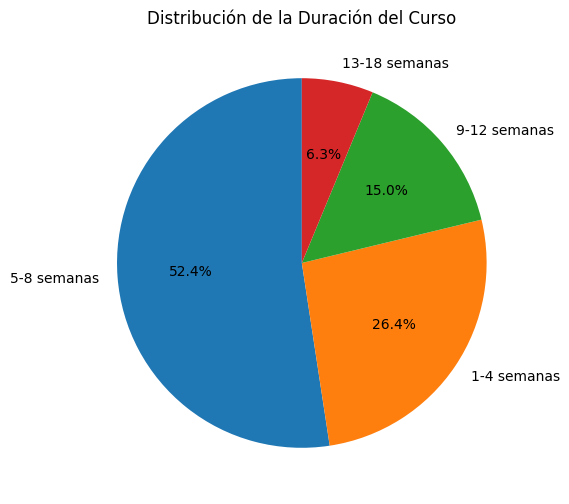

In [ ]:
# Convertir los valores de la columna "course_length" a un formato compatible
edx['course_length'] = edx['course_length'].apply(lambda x: int(x.split()[0]) if isinstance(x, str) else x)

# Definir los rangos de duración
bins = [0, 4, 8, 12, 16, float('inf')]
labels = ["1-4 semanas", "5-8 semanas", "9-12 semanas", "13-16 semanas", "17+ semanas"]

# Crear la columna "duration_range" con las categorías correspondientes
edx['duration_range'] = pd.cut(edx['course_length'], bins=bins, labels=labels)

# Contar la cantidad de cursos en cada rango de duración
duration_counts = edx['duration_range'].value_counts()

# Filtrar los 3 rangos principales y agrupar el resto como "Otros"
top_3 = duration_counts.head(3)
others = pd.Series(duration_counts[3:].sum(), index=["13-18 semanas"])

# Concatenar los resultados
combined_counts = pd.concat([top_3, others])

# Crear el gráfico de pastel
plt.figure(figsize=(8, 6))
plt.pie(combined_counts, labels=combined_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribución de la Duración del Curso")
plt.show()

La mayoria de los cursos a los cuales se han ofrecido corresponde a los rangos de duración de 1 - 8 semanas (78.8%)

#Distribución de Precio

In [ ]:
edx['price'].value_counts().head(5)

FREE-Add a Verified Certificate for $49 USD     270
FREE-Add a Verified Certificate for $99 USD     137
FREE-Add a Verified Certificate for $50 USD      96
FREE-Add a Verified Certificate for $199 USD     85
FREE-Add a Verified Certificate for $149 USD     78
Name: price, dtype: int64

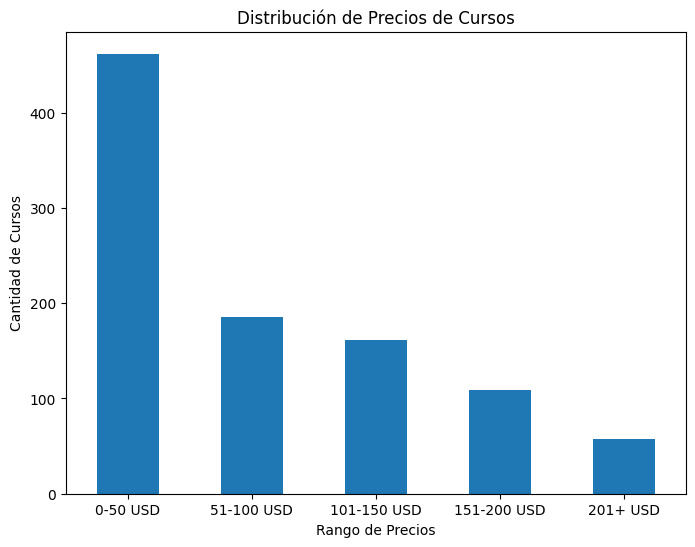

In [ ]:
# Convertir los valores de la columna "price" a un formato numérico
edx['price'] = edx['price'].str.extract(r'\$(\d+(?:\.\d+)?)').astype(float)

# Definir los rangos de precios
bins = [0, 50, 100, 150, 200, float('inf')]
labels = ["0-50 USD", "51-100 USD", "101-150 USD", "151-200 USD", "201+ USD"]

# Crear la columna "price_range" con las categorías correspondientes
edx['price_range'] = pd.cut(edx['price'], bins=bins, labels=labels)

# Contar la cantidad de cursos en cada rango de precios
price_counts = edx['price_range'].value_counts()

# Visualizar los resultados en un gráfico de barras
plt.figure(figsize=(8, 6))
price_counts.plot(kind='bar')
plt.xlabel('Rango de Precios')
plt.ylabel('Cantidad de Cursos')
plt.title('Distribución de Precios de Cursos')

# Mostrar las etiquetas del eje x en posición horizontal
plt.xticks(rotation='horizontal')

plt.show()

El rango de precios que más se ofrece corresponden a montos de 0 a 150 dólares.

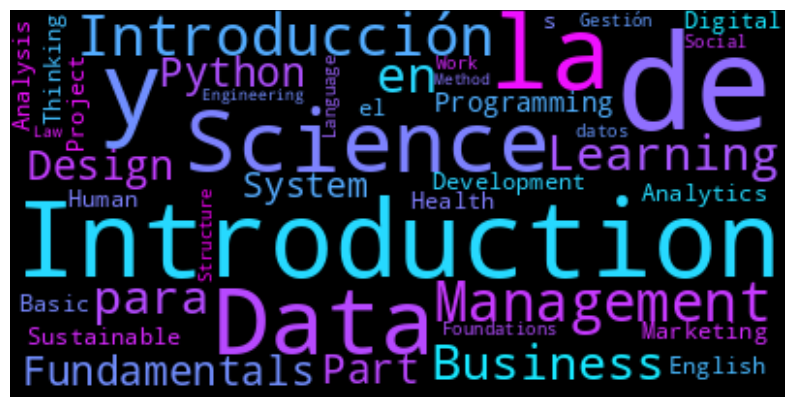

In [ ]:
plt.figure(figsize = (10,9))

text = ' '.join(subject_titles for subject_titles in edx['title'])

word_cloud = WordCloud(collocations = False,
                       background_color='black',
                       colormap = 'cool_r',
                       min_font_size = 8).generate(text)

plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

#CUARTO DATASET UDEMY

In [ ]:
udemy = pd.read_csv('/content/drive/MyDrive/DATASET/DataAnalyst/udemy_courses.csv')

In [ ]:
udemy.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [ ]:
udemy.shape

(3678, 12)

In [ ]:
udemy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [ ]:
udemy.duplicated().sum()

6

In [ ]:
udemy_clean = udemy.drop_duplicates()

In [ ]:
udemy_clean.shape

(3672, 12)

In [ ]:
# Función para detectar el idioma de un texto usando langid.py
def detect_language(text):
    lang, confidence = langid.classify(text)
    return iso639.to_name(lang)

# Aplicar la función a la columna 'course_title' y crear una nueva columna 'language'
udemy_clean['language'] = udemy_clean['course_title'].apply(detect_language)

<ipython-input-66-047c72c45556>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  udemy_clean['language'] = udemy_clean['course_title'].apply(detect_language)


In [ ]:
udemy_clean[['course_id','language']]

#Distribución de Pagado y Gratuito

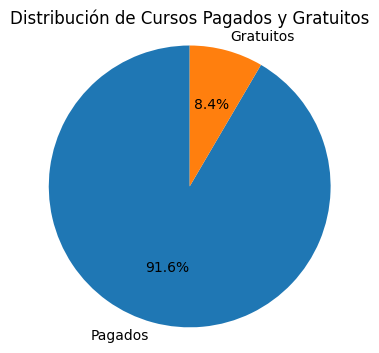

In [ ]:
# Contar la cantidad de cursos pagados y gratuitos
paid_count = len(udemy_clean[udemy_clean['is_paid'] == True])
free_count = len(udemy_clean[udemy_clean['is_paid'] == False])

# Crear la lista de valores y etiquetas
counts = [paid_count, free_count]
labels = ['Pagados', 'Gratuitos']

# Crear el gráfico de pie
plt.figure(figsize=(4, 4))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Cursos Pagados y Gratuitos')
plt.axis('equal')
plt.show()

La mayoría de cursos que ofrece la plataforma son cursos de paga.

#Distribución rango de precios

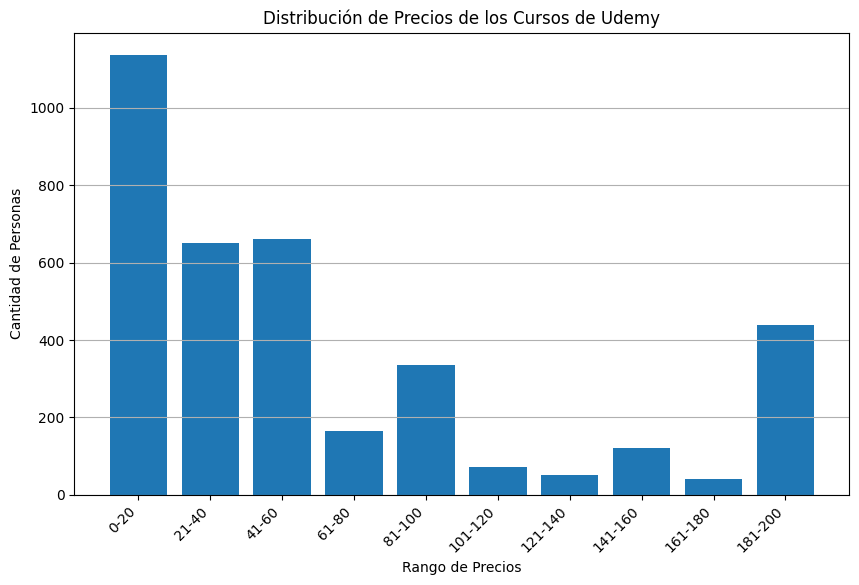

In [ ]:
# Definir los rangos de precios
price_ranges = ['0-20', '21-40', '41-60', '61-80', '81-100', '101-120', '121-140', '141-160', '161-180', '181-200']

# Crear un diccionario para contar la cantidad de personas en cada rango de precios
price_counts = {}
for price_range in price_ranges:
    start, end = map(int, price_range.split('-'))
    price_counts[price_range] = len(udemy_clean[(udemy_clean['price'] >= start) & (udemy_clean['price'] <= end)])

# Obtener los valores de cantidad de personas
count = list(price_counts.values())

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(price_ranges, count)
plt.xlabel('Rango de Precios')
plt.ylabel('Cantidad de Personas')
plt.title('Distribución de Precios de los Cursos de Udemy')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

La distribución de precios que más es ofrecido por un curso es la que se encuentra en rango de 0 - 100 dólares.

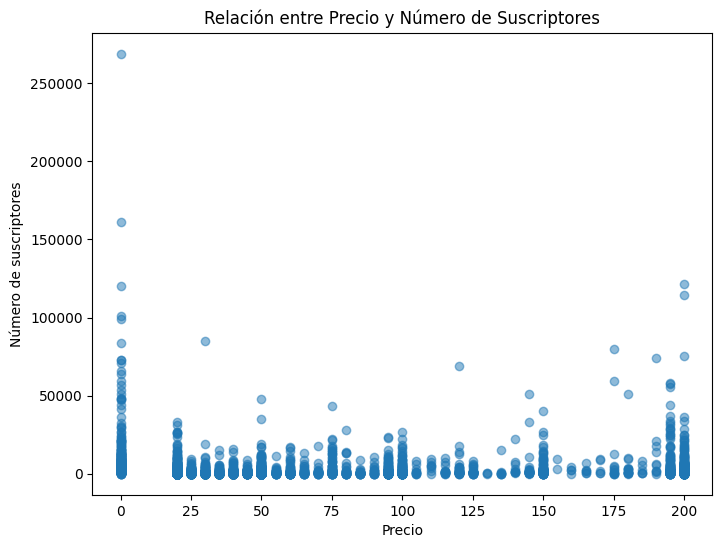

In [ ]:
# Extraer las columnas "price" y "num_subscribers" del DataFrame
price = udemy_clean['price']
num_subscribers = udemy_clean['num_subscribers']

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(price, num_subscribers, alpha=0.5)
plt.xlabel('Precio')
plt.ylabel('Número de suscriptores')
plt.title('Relación entre Precio y Número de Suscriptores')

# Mostrar el gráfico
plt.show()

No existe relación entre el precio y la cantidad de suscripciones , además se observa gran cantidad de inscritos en cursos 0 costo.

#Distribución Nivel

In [ ]:
udemy_clean['level'].value_counts()

All Levels            1925
Beginner Level        1268
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64

#Distribucion de materias

In [ ]:
udemy_clean['subject'].value_counts()

Web Development        1199
Business Finance       1191
Musical Instruments     680
Graphic Design          602
Name: subject, dtype: int64

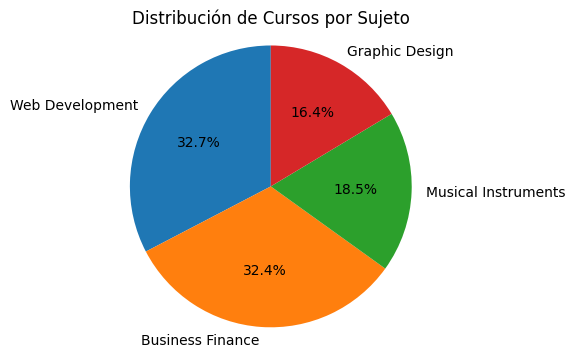

In [ ]:
# Obtener el recuento de cada sujeto
subject_counts = udemy_clean['subject'].value_counts()

# Crear el gráfico de pie
plt.figure(figsize=(4, 4))
plt.pie(subject_counts, labels=subject_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Cursos por Sujeto')
plt.axis('equal')
plt.show()

El top 4 de cursos los cuales tienen más incripciones la lidera Web Developmente seguido de Business Finance de cerca y por ultimo Grafic Design con Musical Instruments.

#Fechas

In [ ]:
# Convertir la columna 'published_timestamp' al formato de fecha y hora
udemy_clean['published_timestamp'] = pd.to_datetime(udemy_clean['published_timestamp'])

<ipython-input-76-c69ef1744ca6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  udemy_clean['published_timestamp'] = pd.to_datetime(udemy_clean['published_timestamp'])


<ipython-input-77-bf87d06420a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  udemy_clean['year'] = udemy_clean['published_timestamp'].dt.year


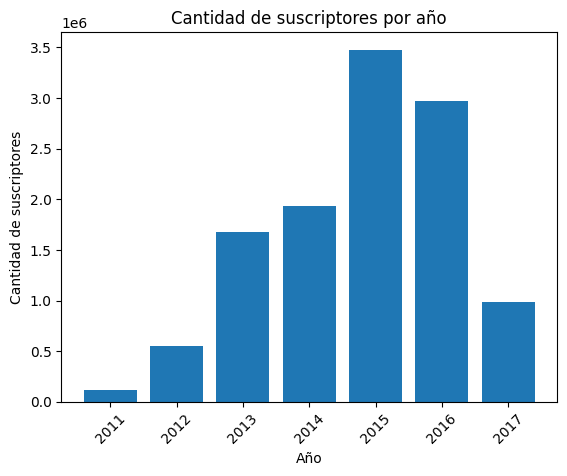

In [ ]:
# Extraer el año de la columna 'published_timestamp' y crear una nueva columna 'year'
udemy_clean['year'] = udemy_clean['published_timestamp'].dt.year

# Obtener la suma de 'num_subscribers' por cada año
subscribers_by_year = udemy_clean.groupby('year')['num_subscribers'].sum()

# Crear el gráfico de barras
plt.bar(subscribers_by_year.index, subscribers_by_year.values)

# Configurar los ejes y el título del gráfico
plt.xlabel('Año')
plt.ylabel('Cantidad de suscriptores')
plt.title('Cantidad de suscriptores por año')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

La mayor cantidad de Suscripciones se obtuvo entre los años 2015 y 2016.

In [ ]:
# Asegurarse de tener la columna 'published_timestamp' en el formato de fecha y hora
udemy_clean['published_timestamp'] = pd.to_datetime(udemy_clean['published_timestamp'])

# Extraer el año de la columna 'published_timestamp' y crear una nueva columna 'year'
udemy_clean['year'] = udemy_clean['published_timestamp'].dt.year

# Obtener la suma de 'num_subscribers' por cada año
subscribers_by_year = udemy_clean.groupby('year')['num_subscribers'].sum()

# Mostrar los totales de suscriptores por año
print(subscribers_by_year)

year
2011     119028
2012     555339
2013    1680153
2014    1930406
2015    3475324
2016    2966644
2017     988941
Name: num_subscribers, dtype: int64


<ipython-input-78-324480c6cb61>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  udemy_clean['published_timestamp'] = pd.to_datetime(udemy_clean['published_timestamp'])
<ipython-input-78-324480c6cb61>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  udemy_clean['year'] = udemy_clean['published_timestamp'].dt.year


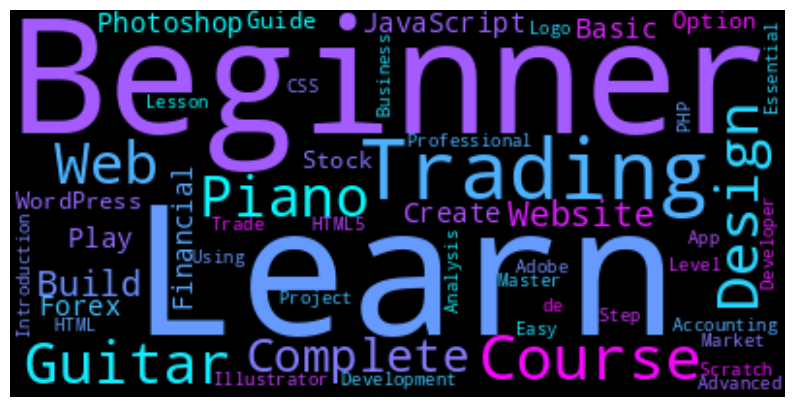

In [ ]:
plt.figure(figsize = (10,9))

text = ' '.join(subject_titles for subject_titles in udemy_clean['course_title'])

word_cloud = WordCloud(collocations = False,
                       background_color='black',
                       colormap = 'cool_r',
                       min_font_size = 8).generate(text)

plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

<ipython-input-99-b7dc643d2987>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = udemy_clean.corr()


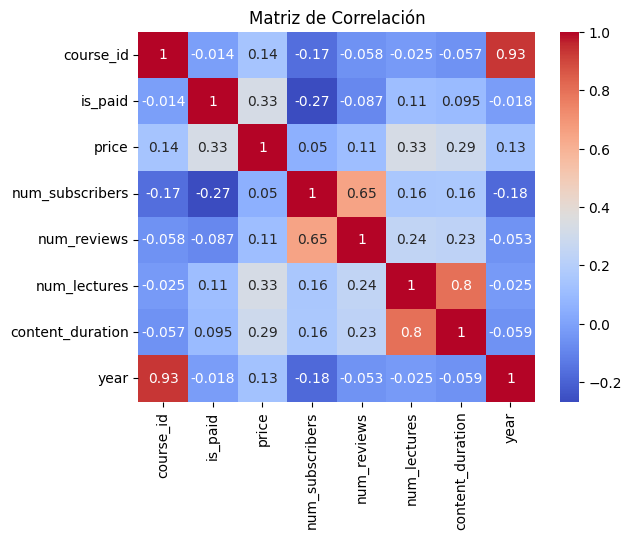

In [ ]:
correlation_matrix = udemy_clean.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()